In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Clustering using K-Means
> https://en.wikipedia.org/wiki/K-means_clustering

Given a ndarray X with n indices and $x_0$ to $x_{n-1}$ observations, where each observation $x_i$ is an 1-dimensional array, k-means clustering partitions the observations into buckets or clusters where observations belonging to the same cluster have their means closer to each other. The $k-$ in k-means clustering determines the number of buckets we want to generate from the given set of observations. The value of $k$ should be always *less than or equal to* $n$.

### K-Means Algorithm
1. Specify the value of $k$ such that $k<=n$, where $n$ is the number of observations in the data set
2. Randomly select $k$ observations from the data set as *centroids*. Centroid are the central point for a cluster
3. Using a distance function, such as euclidean distance measure the distance of all observations $x_i$ from all the centroids
  - Euclidean Distance: 
  $$
  d(p, q) = \sqrt{\sum_{0}^{n-1}(q_i - p_i)^2}
  $$
4. Assign each observation to the cluster having the minimum distance with its centroid
5. Compute new centroids for each cluster by taking the average of its observations
6. Repeat steps $3-5$ until the centroid are the same in two consecutive runs

### Dataset
The Zoo dataset can be used to understand K-Means. The dataset can be acquired from: https://archive.ics.uci.edu/ml/datasets/zoo

In [2]:
# Load the dataset
data = pd.read_csv('./data/zoo.data', header=None, index_col=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Load the data column names
_columns = pd.read_table(
    './data/zoo.names', header=None, sep='\n').iloc[39:56].squeeze().map(lambda x: x.split('\t\t')[0].split(' ')[-1]).reset_index(drop=True)
_columns


0         hair
1     feathers
2         eggs
3         milk
4     airborne
5      aquatic
6     predator
7      toothed
8     backbone
9     breathes
10    venomous
11        fins
12        legs
13        tail
14    domestic
15     catsize
16        type
Name: 0, dtype: object

In [4]:
# Sanitize the column names
columns = pd.concat((pd.Series(['animalname']), _columns)).reset_index(drop=True)
columns


0     animalname
1           hair
2       feathers
3           eggs
4           milk
5       airborne
6        aquatic
7       predator
8        toothed
9       backbone
10      breathes
11      venomous
12          fins
13          legs
14          tail
15      domestic
16       catsize
17          type
dtype: object

In [5]:
# Set the column names
data.columns = columns
data.head()


,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
print('number of na: {0} and null: {1}'.format(data.isna().sum(axis=0).sum(), data.isnull().sum(axis=1).sum()))

number of na: 0 and null: 0


In [7]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
data.columns

Index(['animalname', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

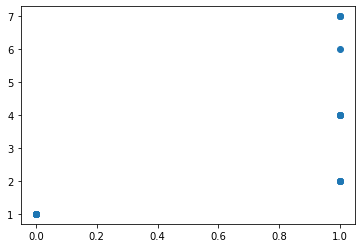

In [9]:
# Visualizing relationship between feature eggs and label type
plt.scatter(data['eggs'].iloc[:25], pd.Categorical(
    data['type'].iloc[:25]))


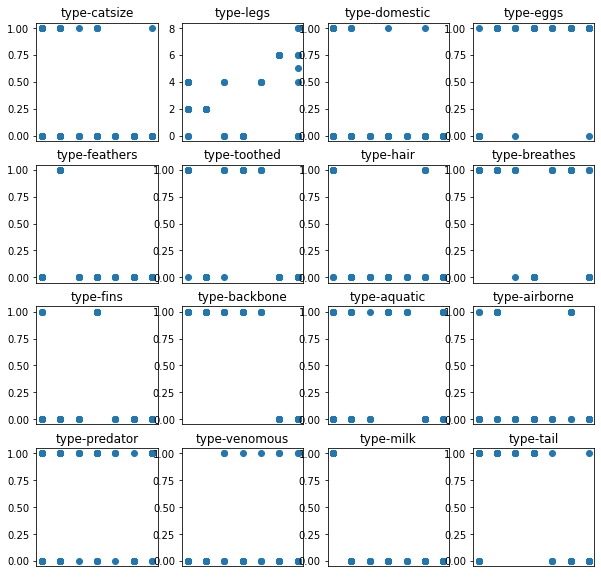

In [10]:
# Visualizing relationship between all features and label type
fig, ax = plt.subplots(4,4)
fig.set_size_inches(10,10)
ax = ax.flatten()
# ....difference({'animalname', 'type'}) excludes these two columns for the result that is produced
for i, c in enumerate(set(data.columns).difference({'animalname', 'type'})):  
    ax[i].scatter(pd.Categorical(data['type']), data[c])
    ax[i].set_title('type-' + c)
    ax[i].set_xticks([])


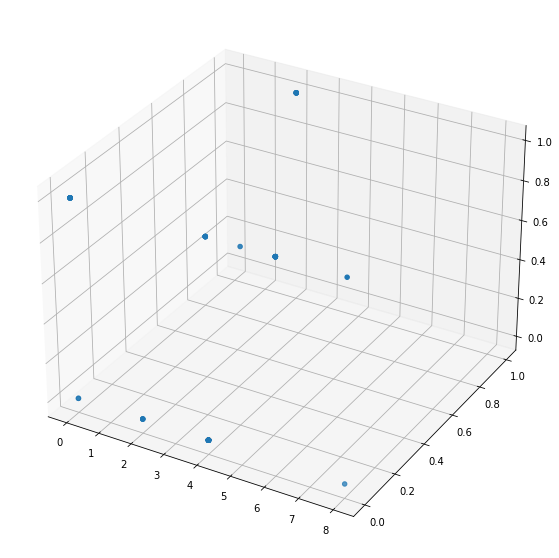

In [11]:
# Plotting 3 random features in a 3-d space
fig = plt.figure()
fig.set_size_inches(10,10)
#fig.subplots(1,1)
ax = plt.axes(projection='3d')
x =data['legs']
y = data['feathers']
z = data['eggs']

ax.scatter(x, y, z)

plt.show()


In [12]:
#Calculating the distance between all points (rows) to a centroid
def distance(X, c):
    return np.sqrt(np.sum(np.square(X - c), axis=1))


In [13]:
# Scale all features/columns
scaledData = data.loc[:, set(data.columns).difference({'animalname', 'type'})].apply(
    lambda s: (s - s.mean())/s.std(), axis=0)


In [14]:
features = scaledData.to_numpy()
features.shape

(101, 16)

In [15]:
# Set the number of clusters. CHANGE the value for k and see what happens to accuracy
k = 7

# randomly choose k points as centroids
cIndices = np.random.choice(range(len(features)), k )
C = features[cIndices]

In [16]:
# Will store a map of the closest centroid index and distance to a point
closestCentroid = {}

In [17]:
# Identifies the centroid that is closest to a point
def measureCentroidDistance(ci, dist):
    for i, d in enumerate(dist):
        # if for a point a centroid is not defined
        if not closestCentroid.get(i):
            # We set the current centroid as its closest
            closestCentroid[i] = (ci, d)
        # If a point already has a centroid defined
        else:
            # We check if the distance of the current centroid is smaller than the centroid already assigned to the point
            if d < closestCentroid[i][1]:
                # If yes we update the centroid and distance for the point
                closestCentroid[i] = (ci, d)


In [18]:
for ci, ri in enumerate(cIndices):
    # sets the closest centroid of the points choosen to be centroid as self with distance as 0
    closestCentroid[ri] = (ci, 0.0)

closestCentroid


{13: (0, 0.0),
 5: (1, 0.0),
 33: (2, 0.0),
 67: (3, 0.0),
 2: (6, 0.0),
 93: (5, 0.0)}

In [19]:
# iterate through all centroids
for i, c in enumerate(C):
    # Calculate the distance of all point to a centroid point
    dist = distance(features, c)
    # Identify for each point which will be the closest centroid and its distance
    measureCentroidDistance(i, dist)
    


In [20]:
# Sanity check. Checking the number of points assigned to each centroid in the first iteration
centroidCount = {}
for c in list(map(lambda x: x[0], closestCentroid.values())):
    if centroidCount.get(c):
        centroidCount[c] += 1
    else:
        centroidCount[c] = 1

centroidCount


{0: 13, 1: 19, 2: 23, 3: 22, 6: 1, 5: 6, 4: 17}

In [21]:
# Sort the closest centroid map
closestCentroid = dict(
    sorted(closestCentroid.items(), key=lambda item: item[0]))


In [22]:
# We will not repeat the process by choosing new centroid. The new centroid will be the average of points assigned to each cluster
grouped = scaledData.groupby(
    list(map(lambda x: x[0], closestCentroid.values())))

_C = grouped.mean().to_numpy()


In [23]:
# We continue the process until the allocation of points to a cluster doesn't change
while ~np.all(C == _C):
    print('shape of C: {0} and _C: {1}'.format(C.shape, _C.shape))
    closestCentroid = {}
    # Update the centroids
    C = _C
    for i, c in enumerate(C):
        dist = distance(features, c)
        measureCentroidDistance(i, dist)
    
    grouped = scaledData.groupby(
        list(map(lambda x: x[0], closestCentroid.values())))
    _C = grouped.mean().to_numpy()

    # If the re-assignment resulted in less number of centroids than the specified 'k', we add dummy centroids
    dummyCentroidIndices = np.random.choice(
        range(C.shape[0]), C.shape[0] - _C.shape[0])
    _C = np.concatenate((_C, C[dummyCentroidIndices]), axis=0)


shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)
shape of C: (7, 16) and _C: (7, 16)


In [24]:
# Setting the estimated cluster ids as indices
data.index = list(map(lambda x: x[0], closestCentroid.values()))

In [25]:
data.head(100)

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
3,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
1,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
5,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
3,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
# Checking how many unique values are in a cluster
data.loc[2]

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
2,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
2,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
2,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
2,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
2,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
2,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
2,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
2,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
2,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
2,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2


In [38]:
# Checking the count of actual points per cluster
data.animalname.groupby(data.type).count()

type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: animalname, dtype: int64

In [32]:
data.animalname.groupby(level=0).count()

0    12
1    19
2    21
3    20
4    10
5     6
6    13
Name: animalname, dtype: int64